### Comparing 20 games each (60 in total) which man United Win,Draw, lose against the top 6 and rest of the league 

In [1]:
#Importing necesswry libraires including numpy and pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import nbformat 
from nbconvert import HTMLExporter

In [2]:
# Assuming you've loaded the dataset into a DataFrame named 'df'
# Replace 'your_dataset.csv' with your actual dataset file path if you're loading it from a file
dfUtd = pd.read_csv('Manchester_United_Match_Results_Under_ETH_Versus_ManCity_Guardiola_First_Three_SeasonsVersusKlopp.csv', encoding='ISO-8859-1') # 

print(dfUtd.columns)
print()
print("===========================================================================================================")
print()
print(dfUtd)

Index(['Date', 'Competition', 'Home Team', 'Home Score', 'Away Team',
       'Away Score', 'Result', 'Wins', 'Losses', 'Draws', 'Win Percentage'],
      dtype='object')


           Date     Competition       Home Team Home Score       Away Team  \
0    13/08/2022  Premier League      Man United          1        Brighton   
1    22/08/2022  Premier League       Brentford          4      Man United   
2    27/08/2022  Premier League      Man United          2       Liverpool   
3    01/09/2022  Premier League     Southampton          0      Man United   
4    04/09/2022  Premier League  Leicester City          0      Man United   
..          ...             ...             ...        ...             ...   
327  28/04/2019  Premier League        Man City          1  Leicester City   
328  06/05/2019  Premier League        Brighton          1        Man City   
329  12/05/2019  FA Cup · Final        Man City          6         Watford   
330         NaN             NaN             NaN  

defeats

In [3]:
# Filter the dataset to find matches where Manchester United were defeated
df_united_defeats = dfUtd[((dfUtd['Home Team'] == 'Man United') & (dfUtd['Home Score'] < dfUtd['Away Score'])) |
                          ((dfUtd['Away Team'] == 'Man United') & (dfUtd['Away Score'] < dfUtd['Home Score']))]

# Select relevant columns: Date, Team names, and score
defeat_details = df_united_defeats[['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score']]

# Print the details of teams that have defeated Manchester United
print(defeat_details)

           Date       Home Team       Away Team Home Score Away Score
0    13/08/2022      Man United        Brighton          1          2
1    22/08/2022       Brentford      Man United          4          0
5    08/09/2022      Man United   Real Sociedad          0          1
7    02/10/2022        Man City      Man United          6          3
17   06/11/2022     Aston Villa      Man United          3          1
20   07/12/2022          CÃ¡diz      Man United          4          2
21   10/12/2022      Real Betis      Man United          1          0
30   22/01/2023         Arsenal      Man United          3          2
42   05/03/2023       Liverpool      Man United          7          0
47   02/04/2023       Newcastle      Man United          2          0
52   20/04/2023         Sevilla      Man United          3          0
56   04/05/2023        Brighton      Man United          1          0
57   07/05/2023        West Ham      Man United          1          0
61   03/06/2023     

wins

In [20]:
# Filter the dataset to find matches where Manchester United won in the Premier League
filtered_df = dfUtd[(dfUtd['Competition'] == 'Premier League') &
                    (((dfUtd['Home Team'] == 'Man United') & (dfUtd['Home Score'] > dfUtd['Away Score'])) |
                     ((dfUtd['Away Team'] == 'Man United') & (dfUtd['Away Score'] > dfUtd['Home Score'])))]

# Convert score columns to numeric types
top_wins_df = filtered_df.copy()
top_wins_df['Home Score'] = pd.to_numeric(top_wins_df['Home Score'], errors='coerce')
top_wins_df['Away Score'] = pd.to_numeric(top_wins_df['Away Score'], errors='coerce')

# Find the matches with the biggest wins by calculating the goal difference
top_wins_df['Goal Difference'] = top_wins_df.apply(lambda row: row['Home Score'] - row['Away Score'] if row['Home Team'] == 'Man United' else row['Away Score'] - row['Home Score'], axis=1)

# Sort by goal difference in descending order to get the biggest wins
top_wins_df = top_wins_df.sort_values(by='Goal Difference', ascending=False).head(10)

# Select relevant columns: Date, Team names, score, and goal difference
win_details = top_wins_df[['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score', 'Goal Difference']]

# Print the details of teams that have been defeated by Manchester United with the biggest wins
print(win_details)

           Date    Home Team          Away Team  Home Score  Away Score  \
25   03/01/2023   Man United        Bournemouth           3           0   
88   26/11/2023      Everton         Man United           0           3   
59   25/05/2023   Man United            Chelsea           4           1   
38   19/02/2023   Man United     Leicester City           3           0   
23   27/12/2022   Man United  Nottingham Forest           3           0   
102  04/02/2024   Man United           West Ham           3           0   
131  14/09/2024  Southampton         Man United           0           3   
120  19/05/2024     Brighton         Man United           0           2   
12   19/10/2022   Man United          Tottenham           2           0   
115  24/04/2024   Man United   Sheffield United           4           2   

     Goal Difference  
25                 3  
88                 3  
59                 3  
38                 3  
23                 3  
102                3  
131          

Draws

In [21]:
# Filter the dataset to find matches where Manchester United drew
df_united_draws = dfUtd[((dfUtd['Home Team'] == 'Man United') & (dfUtd['Home Score'] == dfUtd['Away Score'])) |
                        ((dfUtd['Away Team'] == 'Man United') & (dfUtd['Away Score'] == dfUtd['Home Score']))]

# Select relevant columns: Date, Team names, and score
draw_details = df_united_draws[['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score']]

# Print the details of teams that have drawn with Manchester United
print(draw_details)

           Date       Home Team      Away Team Home Score Away Score
11   16/10/2022      Man United      Newcastle          0          0
13   22/10/2022         Chelsea     Man United          1          1
29   18/01/2023  Crystal Palace     Man United          1          1
35   08/02/2023      Man United   Leeds United          2          2
37   16/02/2023       Barcelona     Man United          2          2
44   12/03/2023      Man United    Southampton          0          0
50   13/04/2023      Man United        Sevilla          2          2
54   27/04/2023       Tottenham     Man United          2          2
69   06/08/2023      Man United  Athletic Club          1          1
89   29/11/2023     Galatasaray     Man United          3          3
94   17/12/2023       Liverpool     Man United          0          0
99   14/01/2024      Man United      Tottenham          2          2
110  30/03/2024       Brentford     Man United          1          1
112  07/04/2024      Man United   

### Picking 20 defeats using the 10 biggest defeats to drill down deeper into in next section

In [6]:
# Filter defeats for Manchester United in the Premier League only
df_united_defeats_premier_league = df_united_defeats[df_united_defeats['Competition'] == 'Premier League'].copy()

# Convert 'Home Score' and 'Away Score' to numeric values
df_united_defeats_premier_league['Home Score'] = pd.to_numeric(df_united_defeats_premier_league['Home Score'], errors='coerce')
df_united_defeats_premier_league['Away Score'] = pd.to_numeric(df_united_defeats_premier_league['Away Score'], errors='coerce')

# Drop rows with invalid score values
df_united_defeats_premier_league = df_united_defeats_premier_league.dropna(subset=['Home Score', 'Away Score'])

# Calculate goal difference for each match
df_united_defeats_premier_league['Goal Difference'] = (df_united_defeats_premier_league['Home Score'] - df_united_defeats_premier_league['Away Score']).abs()

# Sort the defeats by the goal difference to find the biggest defeats
df_united_biggest_defeats = df_united_defeats_premier_league.sort_values(by='Goal Difference', ascending=False).head(10)

# Select 10 random defeats, or as many as available if less than 10
defeat_count = min(10, len(df_united_defeats_premier_league) - len(df_united_biggest_defeats))
df_united_random_defeats = df_united_defeats_premier_league.drop(df_united_biggest_defeats.index).sample(n=defeat_count, random_state=42)

# Select relevant columns: Date, Team names, and score for biggest defeats and other random defeats
biggest_defeat_details = df_united_biggest_defeats[['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score']]
random_defeat_details = df_united_random_defeats[['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score']]

# Print the details of the biggest defeats and random other defeats
print("Biggest Defeats:")
print(biggest_defeat_details)

print("\nRandom Other Defeats:")
print(random_defeat_details)

Biggest Defeats:
           Date       Home Team    Away Team  Home Score  Away Score
42   05/03/2023       Liverpool   Man United           7           0
117  06/05/2024  Crystal Palace   Man United           4           0
1    22/08/2022       Brentford   Man United           4           0
92   09/12/2023      Man United  Bournemouth           0           3
83   29/10/2023      Man United     Man City           0           3
7    02/10/2022        Man City   Man United           6           3
135  28/09/2024      Man United    Tottenham           0           3
130  01/09/2024      Man United    Liverpool           0           3
287  07/11/2018        Man City   Man United           3           1
107  03/03/2024        Man City   Man United           3           1

Random Other Defeats:
           Date    Home Team   Away Team  Home Score  Away Score
0    13/08/2022   Man United    Brighton           1           2
140  28/08/2016   Man United    Man City           1           2
118  1

### Picking 20 draws using the 10 draws to drill down deeper into in next section

In [7]:
# Filter draws for Manchester United in the Premier League only
df_united_draws_premier_league = df_united_draws[df_united_draws['Competition'] == 'Premier League']

# Sort the draws by the goal difference (since it's always zero for draws, just pick the first 10 draws)
df_united_biggest_draws = df_united_draws_premier_league.head(10)

# Select 10 random draws, or as many as available if less than 10
draw_count = min(10, len(df_united_draws_premier_league) - len(df_united_biggest_draws))
df_united_random_draws = df_united_draws_premier_league.drop(df_united_biggest_draws.index).sample(n=draw_count, random_state=42)

# Select relevant columns: Date, Team names, and score for biggest draws and other random draws
biggest_draw_details = df_united_biggest_draws[['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score']]
random_draw_details = df_united_random_draws[['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score']]

# Print the details of the biggest draws and random other draws
print("Biggest Draws:")
print(biggest_draw_details)

print("\nRandom Other Draws:")
print(random_draw_details)

Biggest Draws:
           Date       Home Team     Away Team Home Score Away Score
11   16/10/2022      Man United     Newcastle          0          0
13   22/10/2022         Chelsea    Man United          1          1
29   18/01/2023  Crystal Palace    Man United          1          1
35   08/02/2023      Man United  Leeds United          2          2
44   12/03/2023      Man United   Southampton          0          0
54   27/04/2023       Tottenham    Man United          2          2
94   17/12/2023       Liverpool    Man United          0          0
99   14/01/2024      Man United     Tottenham          2          2
110  30/03/2024       Brentford    Man United          1          1
112  07/04/2024      Man United     Liverpool          2          2

Random Other Draws:
           Date       Home Team   Away Team Home Score Away Score
116  27/04/2024      Man United     Burnley          1          1
201  23/04/2017        Man City  Man United          0          0
113  13/04/2024   

### Picking 20 wins using the 10 biggest wins to drill down deeper into in next section

In [8]:
# Filter wins for Manchester United in the Premier League only
df_united_wins_premier_league = df_united_wins[df_united_wins['Competition'] == 'Premier League'].copy()

# Convert 'Home Score' and 'Away Score' to numeric values
df_united_wins_premier_league['Home Score'] = pd.to_numeric(df_united_wins_premier_league['Home Score'], errors='coerce')
df_united_wins_premier_league['Away Score'] = pd.to_numeric(df_united_wins_premier_league['Away Score'], errors='coerce')

# Drop rows with invalid score values
df_united_wins_premier_league = df_united_wins_premier_league.dropna(subset=['Home Score', 'Away Score'])

# Calculate goal difference for each match
df_united_wins_premier_league['Goal Difference'] = (df_united_wins_premier_league['Home Score'] - df_united_wins_premier_league['Away Score']).abs()

# Sort the wins by the goal difference to find the biggest wins
df_united_biggest_wins = df_united_wins_premier_league.sort_values(by='Goal Difference', ascending=False).head(10)

# Select 10 random wins, including both home and away games
df_united_random_wins = df_united_wins_premier_league.drop(df_united_biggest_wins.index).sample(n=10, random_state=42)

# Select relevant columns: Date, Team names, and score for biggest wins and other random wins
biggest_win_details = df_united_biggest_wins[['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score']]
random_win_details = df_united_random_wins[['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score']]

# Print the details of the biggest wins and random other wins
print("Biggest Wins:")
print(biggest_win_details)

print("\nRandom Other Wins:")
print(random_win_details)

Biggest Wins:
           Date    Home Team          Away Team  Home Score  Away Score
25   03/01/2023   Man United        Bournemouth           3           0
88   26/11/2023      Everton         Man United           0           3
59   25/05/2023   Man United            Chelsea           4           1
38   19/02/2023   Man United     Leicester City           3           0
23   27/12/2022   Man United  Nottingham Forest           3           0
102  04/02/2024   Man United           West Ham           3           0
131  14/09/2024  Southampton         Man United           0           3
120  19/05/2024     Brighton         Man United           0           2
12   19/10/2022   Man United          Tottenham           2           0
115  24/04/2024   Man United   Sheffield United           4           2

Random Other Wins:
           Date     Home Team       Away Team  Home Score  Away Score
119  15/05/2024    Man United       Newcastle           3           2
60   28/05/2023    Man United     

### Man United Loss statistics specific to their biggest defeats

Asking questions such as how much possesion, shots on goals do the have fouls etc

In [9]:
# Load the dataset
manutd_premier_league_defeats_2022_2024 = pd.read_csv('ManUnited_PremierLeague_Defeats2022_2024ETH.csv')

# Display the first few rows of the dataset to verify it loaded correctly
print(manutd_premier_league_defeats_2022_2024)

        Team Name Score  Shots  Shots On Target Possession  Passes  Fouls
0        Man City   3-0     12                8        46%     476      9
1       Liverpool   7-0      9                5        38%     362      9
2       Tottenham   3-0     11                2        39%     395     16
3  Crystal Palace   4-0      7                2        58%     610      8
4       Brentford   4-0     11                5        53%     450     14


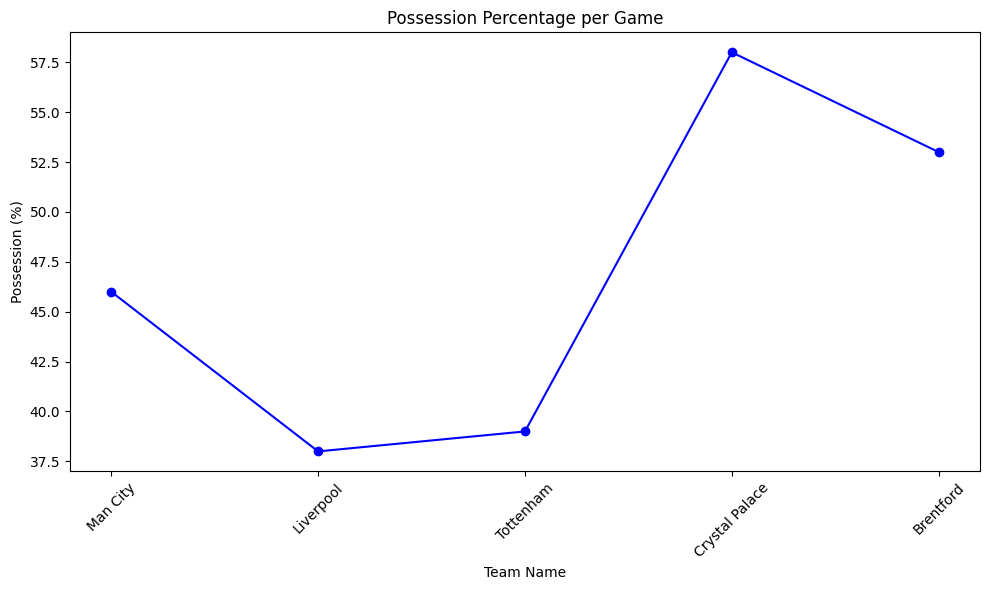

In [12]:
# Plot line chart for possession\import matplotlib.pyplot as plt

# Convert Possession column to numeric values
manutd_premier_league_defeats_2022_2024['Possession'] = manutd_premier_league_defeats_2022_2024['Possession'].str.replace('%', '').astype(float)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(manutd_premier_league_defeats_2022_2024['Team Name'], manutd_premier_league_defeats_2022_2024['Possession'], marker='o', linestyle='-', color='b')
plt.xlabel('Team Name')
plt.ylabel('Possession (%)')
plt.title('Possession Percentage per Game')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

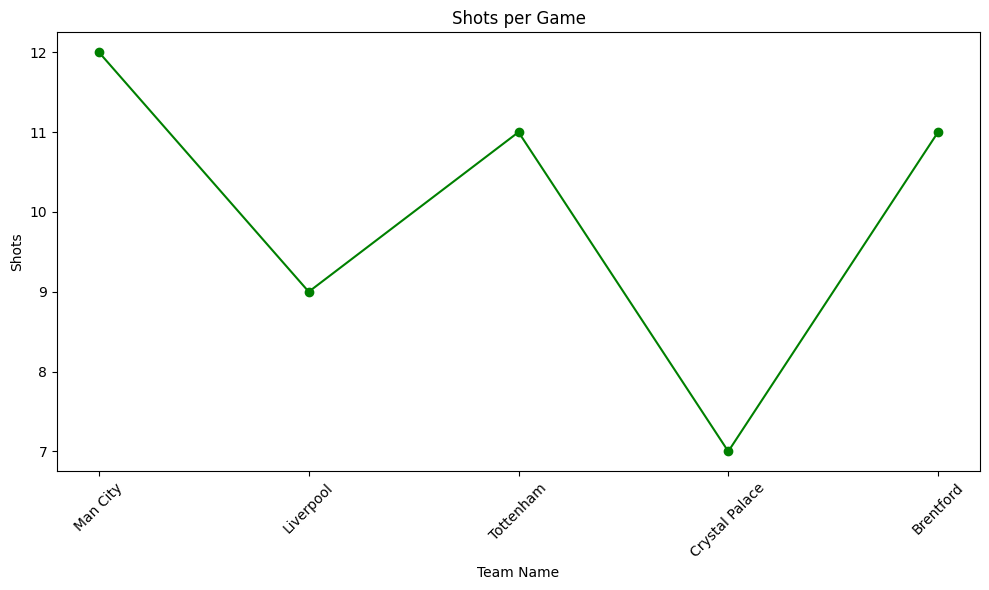

In [15]:
# Plot line chart for shots
plt.figure(figsize=(10, 6))
plt.plot(manutd_premier_league_defeats_2022_2024['Team Name'], manutd_premier_league_defeats_2022_2024['Shots'], marker='o', linestyle='-', color='g')
plt.xlabel('Team Name')
plt.ylabel('Shots')
plt.title('Shots per Game')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

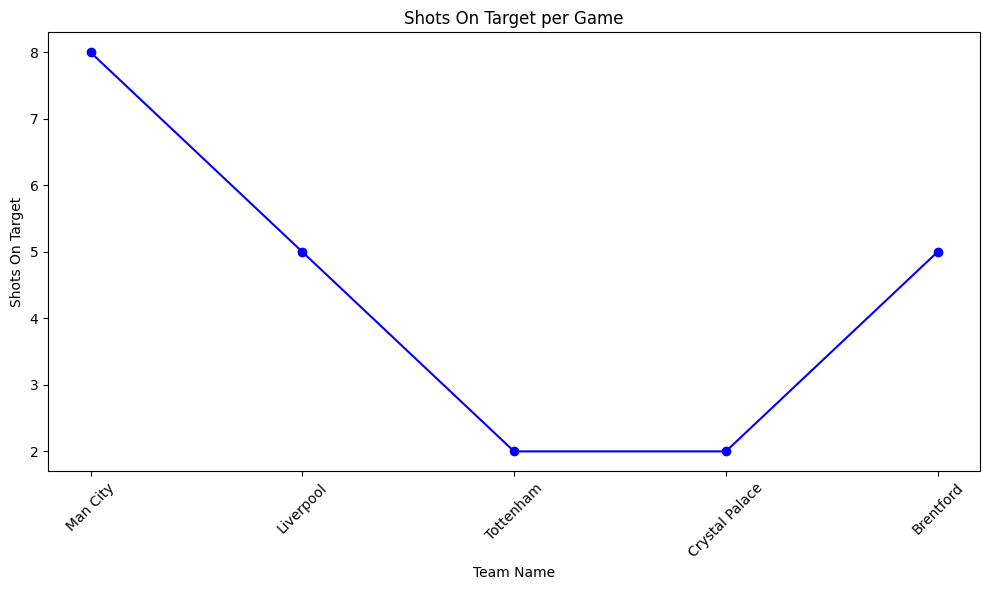

In [13]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(manutd_premier_league_defeats_2022_2024['Team Name'], manutd_premier_league_defeats_2022_2024['Shots On Target'], marker='o', linestyle='-', color='b')
plt.xlabel('Team Name')
plt.ylabel('Shots On Target')
plt.title('Shots On Target per Game')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Fouls Drawn from Man United. The number of received fouls

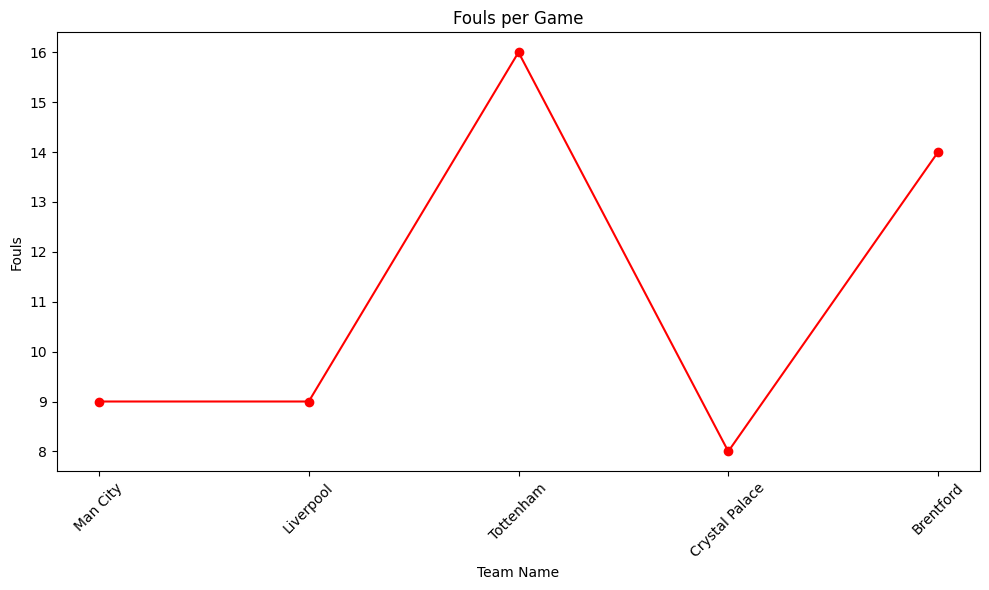

In [16]:
# Plot line chart for fouls
plt.figure(figsize=(10, 6))
plt.plot(manutd_premier_league_defeats_2022_2024['Team Name'], manutd_premier_league_defeats_2022_2024['Fouls'], marker='o', linestyle='-', color='r')
plt.xlabel('Team Name')
plt.ylabel('Fouls')
plt.title('Fouls per Game')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Premier League wins for Man United

In [10]:
# Load the dataset for Manchester United Premier League wins
manutd_premier_league_wins_2022_2024 = pd.read_csv('ManUnited_PremierLeague_Wins_2022_2024.csv')

# Display the first few rows of the dataset to verify it loaded correctly
print(manutd_premier_league_wins_2022_2024)


   Shots  Shots On Target Possession  Passes  Fouls
0   18.0              9.0        41%   438.0   12.0
1   18.0              6.0        59%   579.0   13.0
2    9.0              4.0        49%   444.0    8.0
3   17.0              8.0        66%   631.0   13.0
4   26.0              8.0        57%   572.0    9.0
5   12.0              5.0        52%   528.0   10.0
6   28.0             10.0        52%   583.0    7.0
7   25.0             13.0        72%   730.0    7.0
8   20.0             10.0        56%   611.0   14.0
9   11.0              4.0        45%   462.0    9.0


In [11]:
# Load the dataset 
manutd_premier_league_defeats_2022_2024 = pd.read_csv('ManUnited_PremierLeague_Defeats2022_2024ETH.csv')

# Calculate the average for numeric columns
average_values = manutd_premier_league_defeats_2022_2024[['Shots', 'Shots On Target', 'Passes', 'Fouls']].mean()

# Print the average values
print(average_values)

Shots               10.0
Shots On Target      4.4
Passes             458.6
Fouls               11.2
dtype: float64


### Convert to HTML 

In [2]:
# Load the notebook
with open('ManUnitedMatchStatsWinningVSLosing.ipynb') as f:
    notebook_content = nbformat.read(f, as_version=4)

# Convert the notebook to HTML
html_exporter = HTMLExporter()
html_data, resources = html_exporter.from_notebook_node(notebook_content)

# Save the HTML to a file
with open('ManUnitedMatchStatsWinningVSLosing.html', 'w') as f:
    f.write(html_data)